# General
math.log? provides help text
math.log?? even more

Example latex code:
$S_T = S_0 \exp((r - 0.5\sigma^2) T + \sigma \sqrt{T} z)$

object.info() information about object


In [1]:
#execute shell command
!dir

 Volume in drive C is OS
 Volume Serial Number is 7244-3057

 Directory of C:\Users\Filip\Documents\udacity

2016-12-12  01:07    <DIR>          .
2016-12-12  01:07    <DIR>          ..
2016-12-11  23:35    <DIR>          .ipynb_checkpoints
2016-12-12  01:07           261ÿ152 Algotrading_python.ipynb
2016-12-09  14:29    <DIR>          data
2016-12-03  00:37    <DIR>          data_analasys
2016-12-09  14:40               305 graphlab3.py
2016-12-09  14:31                 0 graphlab3.py.txt
2016-12-03  00:52    <DIR>          Js intro
2016-12-03  01:01    <DIR>          ML intro
2016-12-11  23:33             5ÿ211 ML.ipynb
               4 File(s)        266ÿ668 bytes
               7 Dir(s)   9ÿ278ÿ582ÿ784 bytes free


![title](images/useful_methods.png)

# Reading and plotting

## Pandas

In [ ]:
import pandas as pd
df = pd.read_csv("data/{}.csv".format(symbol))    #dataframe for symbol
df = pd.DataFrame(
    [10,20,30],                     #data: list, tuple, ndarray
    columns=['numbers'],
    index=['a','b','c']
)
df.head()                            #top 5 lines
df.tail(n)                           #bottom n lines
df.index                             #list of index values
df.columns                           #list of column names
df[10:21]                            # lines 10-20
df[x:y,['a','b']]                    #lines x-y with only columns a and b
df['Close']                          #get column named close (series)
df[['Close','Open']]                 #get data frame with these columns
df['Close'].shift(1)                 #same as df['Close'][i-1] for all i
df.values                            #convert to ndarray

ds.max() ds.mean() ...               #methods on data series
df.max() .min() .mean() .std(ddof=0) #performed on each column of df
.kurtosis() .sum() .cumsum() 
.describe() ...
np.sqrt(df)                          #perform numpy operation on dataframe
df.shift(1)                          #Shifts every row down 1 step

df.apply(lambda x: x**2)             #elementwise lambda function application
df.append(pd.DataFrame({'col1':val1,'col2':val2}, index=['i_n',]))        #append a new row without affecting the indices
df.join(df2, how='jointype')         #join operation where jointype=[outer,inner,left,right]

groups = df.groupby('Quarter')       #grouping rows with the same val in 'Quarter'
groups.op() #where op is any dataframe operation

df.applymap(f)                       #Applies function f on every element of dataframe
df.apply(f)                          #Applies function f on every column of df. Can return a series or a single value

In [ ]:
#date_range
dates = pd.date_range(
    '2000-01-01',         #start
    '2010-12-31',         #end
    periods=10,           #if start or end is missing
    freq='5D',            #string or DateOffset
    tz=None,              #time zone name
    name='index'          #name of resulting index
)
df.index = dates

In [31]:
#creating a dataframe with stocks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_data_from_csv(path,startdate,enddate):
    dates = pd.date_range(startdate,enddate) #create a series of datetimeIndex
    df1 = pd.DataFrame(index=dates)
    dfAAPL = pd.read_csv(path, 
                         index_col='Date',
                         parse_dates=True,
                         usecols=['Date','Open','High','Low','Close','Volume'],
                         na_values=['nan'])
    df1['Date'] = df1.index
    df1 = df1.join(dfAAPL)                           #left join
    #df1 = df1.join(dfAAPL, how='type')              #type: [left, right, outer, inner]
    df1 = df1.dropna()                               #remove columns with NaN
    return df1
################################################

dates = pd.date_range('2011-01-01','2011-12-31') #create a series of datetimeIndex
df1 = pd.DataFrame(index=dates)
dfAAPL = pd.read_csv('data/AAPL.csv', 
                     index_col='Date',
                     parse_dates=True,
                     usecols=['Date','Adj Close'],
                     na_values=['nan'])
dfAAPL = dfAAPL.rename(columns={'Adj Close':'AAPL'}) #raname col
df1 = df1.join(dfAAPL)                           #left join
#df1 = df1.join(dfAAPL, how='type')              #type: [left, right, outer, inner]
df1 = df1.dropna()                               #remove columns with NaN


In [ ]:
#Creating a new DataFrame with items from an old dataframe
#renaming columns and limiting rows with a condition
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [ ]:
#rolling statistics

import pandas as pd
pd.rolling_mean(df['col'], window=20)          #ma20
pd.rolling_corr(df1,df2, window=252)           #mcorr252

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
ds.plot()                          #plot pandas data series
df[['Col1','Col2']].plot()         #plot multiple columns in pandas data frame
df[['Col1','Col2']].plot(          #different properties of plot
    subplots=True, 
    color='blue',
    figsize=(8,6)
)
df.plot(label='l1', ax=myaxis)     #plot on same graph with ax myaxis

plt.grid(True)
plt.axis('tight')                  #auto adjust axis'
plt.ylim(0,50)                     #limit y/x-axis
plt.xlabel('index')        
plt.ylabel('value')        
plt.title('A Simple Plot')
plt.legend([x | x € (0 .. 10)])
plt.subplot(339)                   #create 3x3 subplots, next plot in position 9
plt.scatter(y1,y2, marker='S')     #create scatter plot with markers of style S
plt.hist(y, label=['label1', ...], bins=25)  #create histogram with y's columns 
plt.show()                         #display plot

df = df/df[0]                      #normalize all cols to 1.0

plt.plot(
    nd1,
    'cS',                          # where c is a Color and S is a symbol
    lw=1.5                         #linewidth
    label='label'
) 

![title](images/dataframe_plot_settings.png)
![title](images/useful_colors_matplotlib.png)
![title](images/matplotlib_histogram_settings.png)

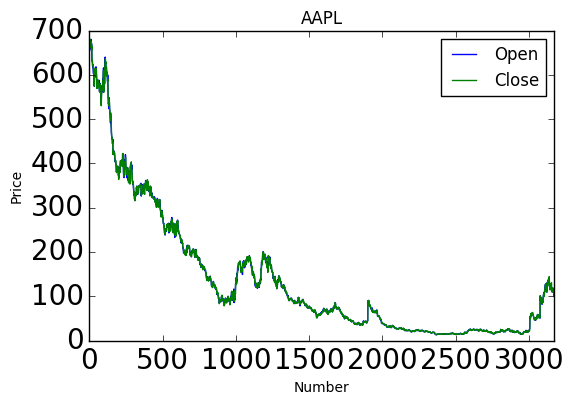

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/AAPL.csv")
axis = df[['Open','Close']].plot(title='AAPL',fontsize=20)
axis.set_xlabel("Number")
axis.set_ylabel("Price")
plt.show()



In [ ]:
#histograms
df_dailyreturns.hist(bins=20, label='AAPL')
plt.axvline(mean,color='w',linestyle='dashed',linewidth=2) #plot vertical line of val mean with properties


beta:  0.82289735994
alpha:  -0.000205056433826


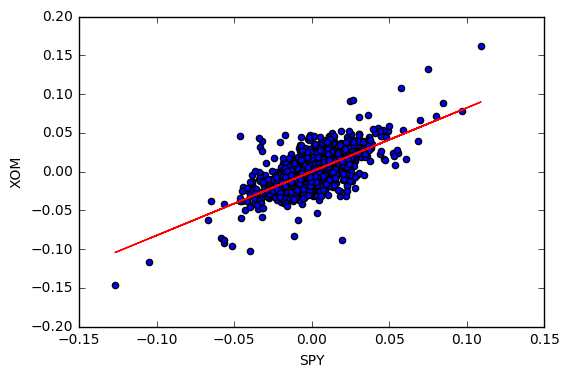

          SPY       XOM
SPY  1.000000  0.668366
XOM  0.668366  1.000000


In [18]:
#scatterplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfXOM = pd.read_csv("data/XOM.csv")
dfSPY = pd.read_csv("data/SPY.csv")
dr_XOM = get_daily_returns(dfXOM['Adj Close'])
dr_XOM = dr_XOM.rename('XOM')
dr_SPY = get_daily_returns(dfSPY['Adj Close'])
dr_SPY = dr_SPY.rename('SPY')
df_scatter = pd.concat([dr_SPY,dr_XOM],axis=1)

df_scatter.plot(kind='scatter',x='SPY',y='XOM')                          #make scatter plot

beta_XOM, alpha_XOM = np.polyfit(df_scatter['SPY'],df_scatter['XOM'],1)  #calculate alpha and beta
print 'beta: ', beta_XOM
print 'alpha: ', alpha_XOM
plt.plot(df_scatter['SPY'], beta_XOM * df_scatter['SPY'] + alpha_XOM, '-', color='r') #print regression line
plt.show()

print df_scatter.corr(method='pearson')                                  #calculate the correlation

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')


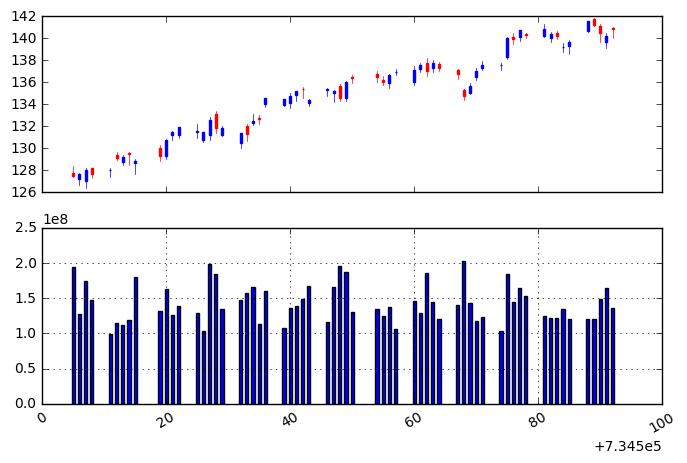

In [33]:
#Candlesticks plot
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import date2num
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8,5)) #2 subplot axis that shares x axis
dfSPY = get_data_from_csv('data/SPY.csv','2012-01-01','2012-03-31')
print dfSPY.columns
#dfSPY['d'] = df.Date.map(date2num)
dfSPY['Date'] = dfSPY['Date'].apply(lambda date: date2num(date.to_pydatetime()))
candlestick_ohlc(ax1, dfSPY[['Date', 'Open', 'High', 'Low','Close']].values, width=0.3, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date()                                     #dates on x-axis

#Add volume
plt.bar(dfSPY['Date']-0.25,dfSPY['Volume'], width=0.5)
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=30)  #rotate labels on x-axis
plt.show()


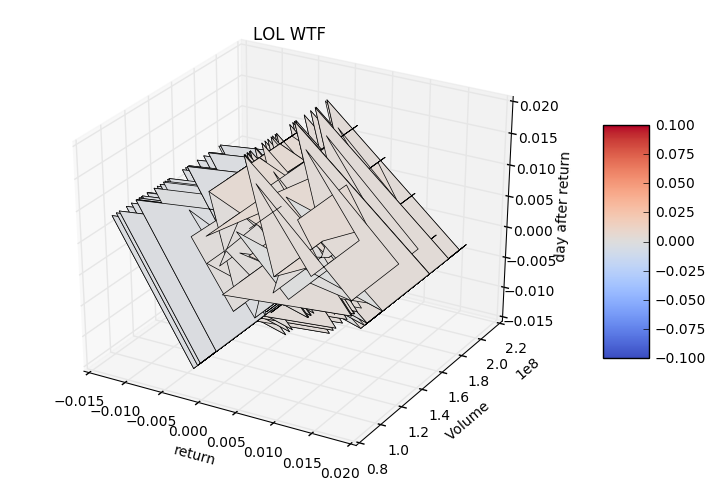

In [47]:
#3D plotting
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
x, y = np.meshgrid(get_daily_returns(dfSPY['Close']),dfSPY['Volume'])
z = get_daily_returns(dfSPY['Close'].shift(-1))

fig = plt.figure(figsize=(9, 6))         
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, rstride=2, cstride=2,                                
                       cmap=plt.cm.coolwarm, linewidth=0.5,                                
                       antialiased=True)
#ax.scatter(x, y, z, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('return')         
ax.set_ylabel('Volume')         
ax.set_zlabel('day after return')
ax.set_title('LOL WTF')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

![title](images/matplotlib_3d_settings.png)

## NumPy

In [ ]:
import numpy as np
nd1 = df1.values                   #dataframe to ndarray
nd1[x,y]                           #get element
nd1[nparray]                       #get elements with indexes of nparray
nd1[cond]                          #cond=nparray of same dimension value bool. masking
nd1 = nd1[x0:xn,y0:yn]             #get range
nd1 = np.array([(1,2,3),(4,5,6)])  #new np array
nd1 = np.array(df)                 #new np array from DataFrame
nd1 = np.empty((5,4,3))            #new empty 5x4x3 np array
nd1 = np.ones((5,4), dtype=np.int_)#new 5x4 np array with 1 ints
    dtype=[x | x = (t bits, b bool, i int, u unsigned, f float, o object, a string, U unicode)]
nd1 = np.zeros((5,4))
nd1 = np.random.random((5,4))      #new np array with random values (0,1) of dimension
nd1 = np.random.normal(50,10,size=(2,3)) #new np array values in distribution of mean=50 std=10
nd1 = np.random.randint(0,10,size=5)     #new np array in range (0,10)

nd1.shape                          #tuple of nd array dimensions
nd1.size                           #total nr of elements in nd array
nd1.dtype                          #type of the array elements
nd1.sum()
nd1.sum(axis=0)                    #sum of each column
nd1.sum(axis=1)                    #sum of each row
nd1.min(axis=0/1)
nd1.min(axis=0/1)
nd1.mean()
nd1.transpose()
nd1.cumsum()                       #cumulative sum
nd1.argmax(), nd1.argmin()         #get index of min/max value

#aritmetic operations are all elementwise
* / + -
#function call are all elementwise
f(nd1)

## Indicators

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
dates = pd.date_range('2012-01-09','2012-09-09')
df = pd.DataFrame(index=dates)
df2 = pd.read_csv('data/AAPL.csv',index_col='Date',parse_dates=True, na_values=['nan'])
df = df.join(df2)
df = df.dropna()

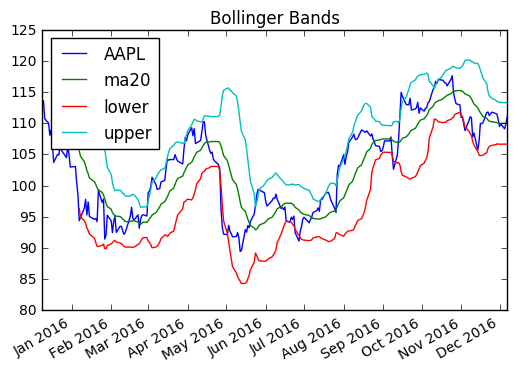

In [28]:
#bollinger bands
def get_bollinger_bands(ds, period=20, std=2):
    ds_mean = ds.rolling(window=period).mean()
    ds_std = ds.rolling(window=period).std()
    ds_upper = ds_mean + std*ds_std
    ds_lower = ds_mean - std*ds_std
    return ds_mean, ds_lower, ds_upper


mean, lower_band, upper_band = get_bollinger_bands(df['Adj Close'],20,2)
ax = df['Adj Close'].plot(title='Bollinger Bands', label='AAPL')
mean.plot(label='ma20', ax=ax)
lower_band.plot(label='lower', ax=ax)
upper_band.plot(label='upper', ax=ax)
ax.legend(loc='upper left')
plt.show()

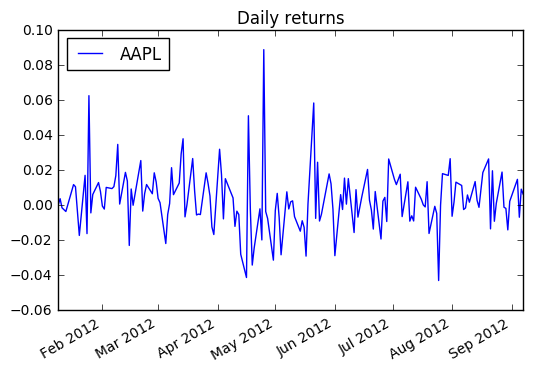

In [29]:
#Daily returns
def get_daily_returns(df):
    df_copy = df.copy()
    df_copy[1:] = (df[1:]/df[:-1].values)-1
    df_copy[0] = 0
    return df_copy

dr = get_daily_returns(df['Adj Close'])
ax = dr.plot(title='Daily returns', label='AAPL')

ax.legend(loc='upper left')
plt.show()

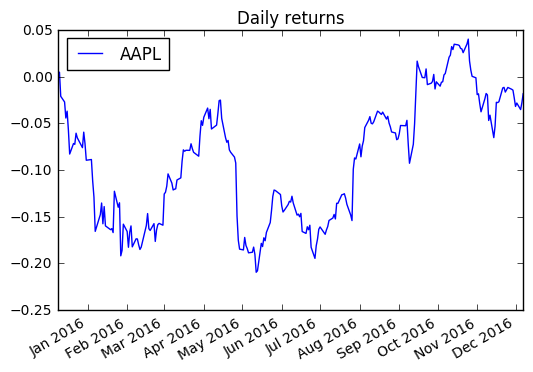

In [35]:
#cumulative returns
def get_cumulative_returns(df):
    return (df/df[0])-1


cr = get_cumulative_returns(df['Adj Close'])
ax = cr.plot(title='Daily returns', label='AAPL')

ax.legend(loc='upper left')
plt.show()

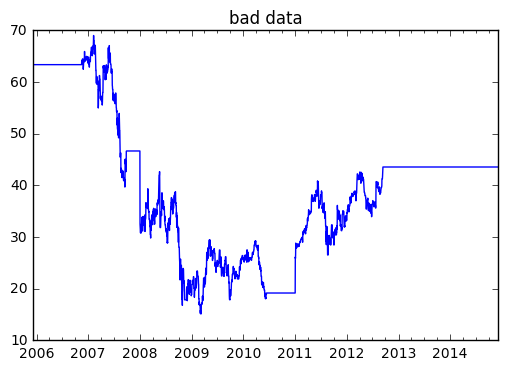

In [59]:
#clean data
import pandas as pd
dates2 = pd.date_range('2005-12-09','2014-12-07')
a = pd.DataFrame(index=dates2)
b = pd.read_csv('data/FAKE2.csv',index_col='Date',parse_dates=True, na_values=['nan'])
a = a.join(b)
a = a.fillna(method='ffill')
a = a.fillna(method='bfill')
ax = a['Adj Close'].plot(title='bad data', label='FAKE2')

#ax.legend(loc='upper left')
plt.show()

## Statistics

In [46]:
#Annualized Sharpe ratio
#S = sqrt(252) * E[R_p - R_f] / std[R_p]
def get_sharpe_ratio(dr,freq=252):
    return np.sqrt(252) * (dr - 0).mean() / dr.std()

df2 = get_daily_returns(df1)
print 'sharpe ratio: ' , str(get_sharpe_ratio(df2['AAPL']))

sharpe ratio:  0.918138576112


In [ ]:
#Optimizing a portfolio of strategies/stocks
#limit for x = (0,1], sum(x_i | i = 0..n) = 1.0

### Machine learning testing

In [ ]:
Metric 1: Error measuring
RMSE = sqrt(sum(errors^2)/N)

Metric 2: Correlation
Calculate correlation coefficient between y_test and y_predict data
np.corrcoef()

## Input Output


In [ ]:
urlretrieve(url, '.folder/outputfile.txt')          #download file from url
lines = open('./folder/outputfile.txt', 'r').readlines() #list of lines from file
lines = [line.replace(' ','') for line in lines]         #replace all blanks

![title](images/readcsv_settings.png)

## Machine Learning trading

# Zipline
## General

In [ ]:
def initialize(context):
    #run once for algo
    
def handle_data(context, data):
    #run each iteration for algo
    
def analyze(context, perf):
    #runs once after backtest is done
    
#place a column in backtest, named AAPL, tracking price of AAPL
record(AAPL=data.current(symbol('AAPL'), 'price'))

#read in performance DataFrame
perf = pd.read_pickle('buyapple_out.pickle')

# Skip first 300 days to get full windows
context.i += 1
if context.i < 300: return



## Sample Algorithm

In [ ]:
%%zipline --start 2000-1-1 --end 2014-1-1 -o perf_dma


from zipline.api import order_target, record, symbol, history
import numpy as np

def initialize(context):
    context.i = 0


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = history(100, '1d', 'price').mean()
    long_mavg = history(300, '1d', 'price').mean()

    # Trading logic
    if short_mavg[0] > long_mavg[0]:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(symbol('AAPL'), 100)
    elif short_mavg[0] < long_mavg[0]:
        order_target(symbol('AAPL'), 0)

    # Save values for later inspection
    record(AAPL=data[symbol('AAPL')].price,
           short_mavg=short_mavg[0],
           long_mavg=long_mavg[0])


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()